# **Практика 5 (семинар). Агрегирование и группировка данных**

[SmartLMS](https://edu.hse.ru/mod/quiz/view.php?id=1759750)

Вы digital-менеджер музыкального лейбла. Ваша задача — разработать стратегию продвижения нового артиста. В вашем распоряжении — датасет с ключевыми метриками по его релизам:


| Признак             | Описание                                |
| ------------------- | --------------------------------------- |
| track |  название конкретной песни или композиции |
| album |  название альбома или сингла, в который входит этот трек |
| album_release_year |  год, когда альбом был первоначально выпущен и опубликован. |
| period |  отчетный период, за который собраны данные (год/месяц) |
| period_year |  отчетный год, за который собраны данные |
| period_month |  отчетный месяц, за который собраны данные |
| country |  страна, из которой поступило прослушивание |
| platform |  название стримингового сервиса, на котором было совершено прослушивание |
| playcount |  количество воспроизведений данного трека на указанной платформе в указанной стране за отчетный период |
| royalty |  cумма денег, которую заработал этот трек за все свои проигрывания в указанный период, стране и на платформе |

In [5]:
import pandas as pd
df = pd.read_csv('data/music_label_data.csv')

In [ ]:
# 1 если russia, 0 в противном случае

def code(x):
    if x=='Russia':
        return 1
    else:
        return 0

df['country'].apply(code)

0        0
1        0
2        0
3        0
4        0
        ..
23518    0
23519    0
23520    0
23521    0
23522    0
Name: country, Length: 23523, dtype: int64

In [8]:
df['country'].apply(lambda x: 1 if x=='Russia' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
23518    0
23519    0
23520    0
23521    0
23522    0
Name: country, Length: 23523, dtype: int64

## **Задание 1**

> *Изучите предоставленные данные и укажите:*
>1) *количество наблюдений*?

In [2]:
df.shape[0]

23523

>2. *отчетный период данных (`period`):*  
>- *с*: ``???``  
>- *до*: ``???``  

In [3]:
df['period'].min(), df['period'].max()

('2023/08', '2025/05')

>3. *количество треков (`track`) артиста* ?

In [4]:
df['track'].nunique()

56

>4. *количество альбомов (`album`) артиста (без учета синглов)* ?


In [5]:
df[
    df['album'].str.contains('album')
]['album'].nunique()

4

In [6]:
# и так видно что 4
df['album'].unique()

array(['album_01', 'single', 'album_02', 'album_03', 'album_04'],
      dtype=object)

>5. *количество синглов артиста (**single**; `album`)* ?


In [7]:
df[
    df['album'].str.contains('single')
]['album'].nunique()

1

In [8]:
# и так видно что 1
df['album'].unique()

array(['album_01', 'single', 'album_02', 'album_03', 'album_04'],
      dtype=object)

>6. *общее количество прослушиваний треков артиста (`playcount`)* ?

In [9]:
df['playcount'].sum()

np.int64(20738911)

>7. *общий доход (`royalty`) от треков (округлите до сотых)* ?

In [10]:
df['royalty'].sum().round(2)

np.float64(62749.34)

---

## **Задание 2**

### *Задание 2.1*

>*Укажите названия платформы (`platform`) на которой доход от стриминга (`royalty`)*
>- наименьший: `???`
>- наибольший: `???`

In [11]:
df_grouped = df.groupby('platform')['royalty'].sum().sort_values()

print(f'Наибольшее число прослушиваний у платформы: {df_grouped.index[-1]}')
print(f'Наименьшее число прослушиваний у платформы: {df_grouped.index[0]}')

df_grouped

Наибольшее число прослушиваний у платформы: Spotify
Наименьшее число прослушиваний у платформы: KuGou


platform
KuGou                                     0.231677
Kuwo                                      0.381225
iHeart Radio                              1.091217
QQ Music                                  1.735461
NetEase(Hangzhou) Network Co., Ltd       17.278625
Anghami                                  71.477402
Deezer                                  100.964304
Tidal Music AS                          123.607304
Facebook                                135.885184
SoundCloud                              189.113763
Zvuk (DSP)                             1986.497935
Tik Tok                                7470.069860
YouTube                               12120.898745
Spotify                               40530.111510
Name: royalty, dtype: float64

### *Задание 2.2*

>*Создайте новый признак `CPL`, в котором будет информация о стоимости одного прослушивания (`royalty`/`playcount`). Укажите названия платформы (`platform`) на которой средняя стоимость одного прослушивания (`CPL`)*
>- наименьшая: `???`
>- наибольшая: `???`

In [13]:
df['CPL'] = df['royalty'] / df['playcount']
df_grouped = df.groupby('platform')['CPL'].mean().sort_values()

print(f'Наименьшая стоимость прослушивания на платформе: "{df_grouped.index[0]}"')
print(f'Наибольшая стоимость прослушивания на платформе: "{df_grouped.index[-1]}"')

df_grouped

Наименьшая стоимость прослушивания на платформе: "Tik Tok"
Наибольшая стоимость прослушивания на платформе: "iHeart Radio"


platform
Tik Tok                               0.000202
Facebook                              0.000422
QQ Music                              0.012788
KuGou                                 0.015845
NetEase(Hangzhou) Network Co., Ltd    0.039736
Kuwo                                  0.063537
Spotify                               0.145776
Zvuk (DSP)                            0.191398
Deezer                                0.228929
SoundCloud                            0.251935
YouTube                               0.260224
Anghami                               0.335587
Tidal Music AS                        0.456594
iHeart Radio                          0.545609
Name: CPL, dtype: float64

### *Задание 2.3*

>*Укажите как выглядит распределение количества треков (`track`) на каждой платформе (`platform`):*

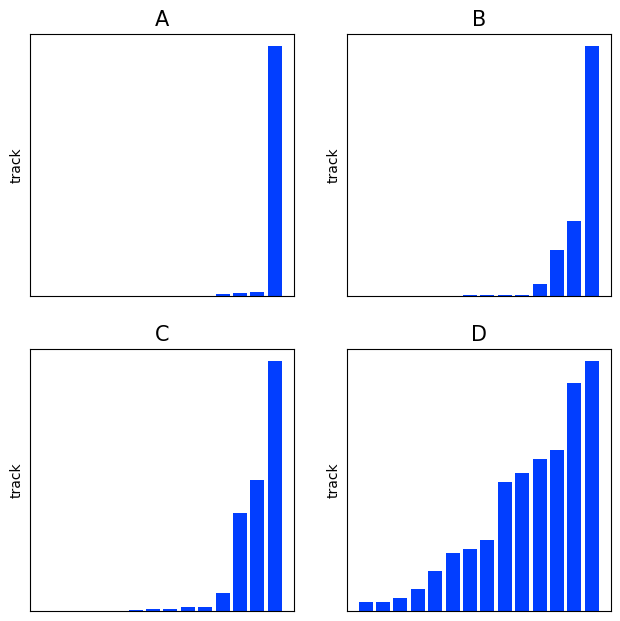

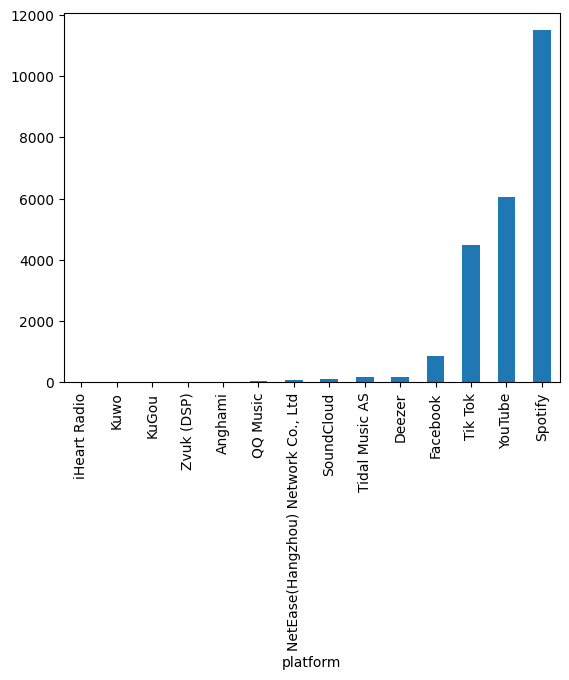

In [14]:
df.groupby('platform')['track'].count().sort_values().plot(kind='bar');

**Ответ**: `B`

---

## **Задание 3**

Артист, продвижением которого мы занимаемся, создает музыку на русском языке. Это определяет нашу  целевую аудиторию — слушателей в странах с широким распространением русского языка:

In [15]:
russian_speaking_countries = ["Belarus", "Kazakhstan", "Kyrgyzstan", "Ukraine", "Uzbekistan", "Tajikistan", "Azerbaijan", "Moldova", "Armenia", "Turkmenistan", "Georgia", "Latvia", "Estonia", "Lithuania", "Israel", "Germany"]

Проверим гипотезу о том, что доход от стриминга в России и русскоговорящих странах больше чем в других регионах.

### *Задание 3.1*

>*Создайте новый признак `segment`, на основе признака `country`:*
>- Если эта страна Россия (**Russia**), вернуть само значение `country`
>- Если страна входит в список русскоговорящих (**russian_speaking_countries**), вернуть **RS**
>- Во всех остальных случаях вернуть **Other**

In [16]:
def code(x):
    if x == 'Russia':
        return x
    elif x in russian_speaking_countries:
        return 'RS'
    else:
        return 'Other'
    
df['segment'] = df['country'].apply(code)

>*Укажите процент дохода от стриминга (`royalty`) и прослушиваний (`playcount`) в каждом сегменте (`segment`). Ответы округлите до двух знаков*
>
>| | % дохода | % прослушиваний |
> | --- | ---- | --- | 
> | Russia | `?` | `?` | 
> | RS | `?` | `?` | 
> | Other | `?` | `?` | 

In [17]:
df_platform = df.groupby('segment').agg({
    'royalty': 'sum',
    'playcount': 'sum'
})

(df_platform / df[['royalty', 'playcount']].sum() * 100).round(2)

,royalty,playcount
segment,,
Other,58.95,49.03
RS,36.76,49.02
Russia,4.29,1.95


<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**🤔 Question**  

*Верна ли была наша гипотеза?*

</div>


### *Задание 3.2*

>*Укажите среднюю стоимость одного прослушивания (`CPL`) для каждого сегмента (`segment`).  Ответы округлите до двух знаков.*
>
> | | Средний CPL | 
> | ---- | --- | 
> | Russia | `?` | 
> | RS | `?` | 
> | Other | `?` | 

In [18]:
df.groupby('segment')['CPL'].mean().round(2)

segment
Other     0.15
RS        0.13
Russia    0.27
Name: CPL, dtype: float64

### *Задание 3.3*

>*Укажите как выглядит распределение размаха\* стоимости одного прослушивания (`CPL`) для России и других русскоговорящих стран (`country`).*
>
>\*Размах - это разница между максимумом и минимумом

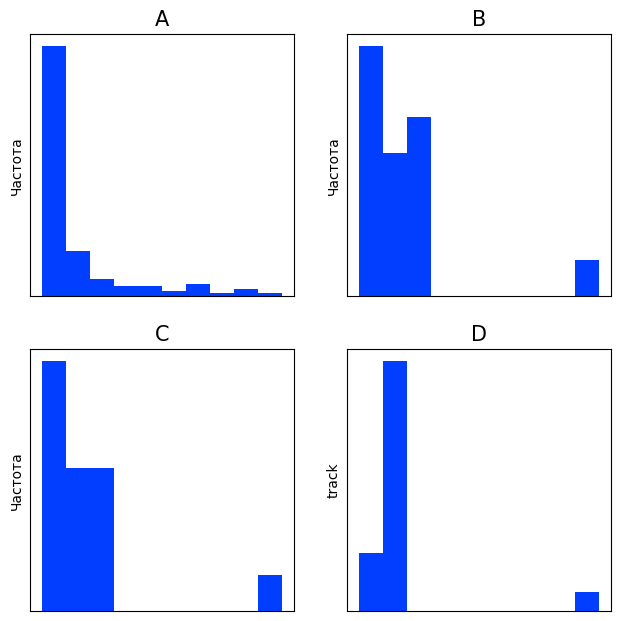

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. Отфильтруйте наблюдения и оставьте те, которые не относятся к сегменту (`segment`) **Other**

2. По отфильтрованным данным, постройте сводную таблицу, где по строкам идут страны (`country`), а в столбцах максимальная и минимальная стоимость одного прослушивания (`CPL`) для каждой страны

3.  В сводной таблице создайте новый признак `range`, который будет представлять из себя размах `CPL`

4. Визуализируйте распределение `range`

</div>

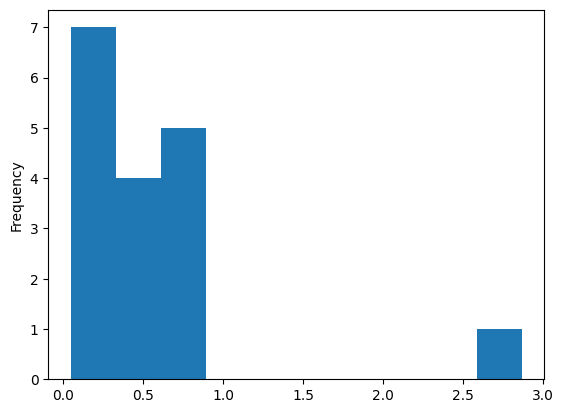

In [37]:
df_flt = df[df['segment'] != 'Other']
df_grouped = df_flt.groupby('country')['CPL'].agg(['min', 'max'])
df_grouped['range'] = df_grouped['max'] - df_grouped['min']

df_grouped['range'].plot(kind='hist');

**Ответ**: `B`

---

## **Задание 4**

Построим матрицу `BCG` для наших продуктов (треков), благодаря этой матрице, мы сможем понять какие треки артиста следуют продвигать:

| | ВЫСОКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ	| НИЗКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ | 
 | --- | --- | --- | 
| ВЫСОКИЙ РОСТ ПОПУЛЯРНОСТИ | ЗВЕЗДЫ | ДИКИЕ КОШКИ | 
| НИЗКИЙ РОСТ ПОПУЛЯРНОСТИ | ДОЙНЫЕ КОРОВЫ | СОБАКИ | 

- ЗВЕЗДЫ: Лидер по прослушиваниям, который продолжают активно расти. Этот трек можно использовать для продвижения артиста.
 - ДИКИЕ КОШКИ: Перспективные треки. Показывают высокий рост, но их доля в общем объеме еще мала. Треки, которые можно продвигать.
- ДОЙНЫЕ КОРОВЫ: Имеют высокое количество прослушиваний, но рост уже остановился. Стабильно генерируют доход без дополнительных инвестиций.
- СОБАКИ: Аутсайдеры. Низкая доля и низкие темпы роста. Обычно не требуют внимания.

### *Задание 4.1*

>*Для начала найдем долю прослушиваний каждого трека:*
>$$ \text{rate playground}_{\text{трека}} = \frac{\text{playcount}_{\text{трека}}}{\text{playcount}_{\text{по всем трекам}}}$$

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. *Найдите общее количество прослушиваний треков артиста (`playcount` по всем трекам).*  

2. *Постройте сводную таблицу, где:*  
   - по строкам идут композиции (*`track`*)  
   - в столбце указано общее количество прослушиваний (*`playcount`*) каждой композиции  

3. *Найдите долю прослушиваний каждого трека (`rate playcount трека`), разделив сводную таблицу на общее количество прослушиваний (`playcount` по всем трекам).*  

4. *Будем считать:*  
   - **ВЫСОКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ** — если доля прослушиваний трека больше среднего. Сохраните эти треки в переменную `high_playcount`.  
   - **НИЗКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ** — если доля прослушиваний трека меньше среднего. Сохраните эти треки в переменную `low_playcount`.  

</div>

In [57]:
# 1.
total_play = df['playcount'].sum()

# 2.
df_track = df.groupby('track')['playcount'].sum()

# 3. 
df_track = df_track / total_play

df_track.head()

track
track_00    0.965712
track_01    0.015355
track_02    0.000679
track_03    0.002129
track_04    0.000180
Name: playcount, dtype: float64

In [58]:
# 4.
high_playcount = df_track[df_track > df_track.mean()]
low_playcount = df_track[df_track <= df_track.mean()]

### *Задание 4.2*

>*Теперь найдем относительный рост популярности каждого трека по каждому отчетному периоду:*
>$$ \text{grouth}_{\text{трека}} = \frac{\text{playcount}_{\text{текущий период}} - \text{playcount}_{\text{прошлый период}}}{\text{playcount}_{\text{прошлый период}}} \times 100 \%$$

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. *Постройте сводную таблицу, где:*  
   - по строкам идут отчетные периоды (`period`) и композиции (`track`),  
   - в столбце указано общее количество прослушиваний (`playcount`) каждой композиции в каждый отчетный период.  

2. *Примените к сводной таблице метод* `.unstack()`.  
   - В результате отчетные периоды (`period`) останутся по строкам,  
   - а столбцами станут композиции (`track`).  
   - Затем отсортируйте таблицу по отчетным периодам (`period`).  

   *Пример итоговой структуры:*  

   | Трек 1 | ... | Трек N |
   |--------|-----|--------|
   | Период 1: Кол-во прослушиваний | ... | ... |
   | Период 2: Кол-во прослушиваний | ... | ... |
   | ...    | ... | ... |
   | Период N: Кол-во прослушиваний | ... | ... |


3. *Чтобы посчитать рост популярности трека (`growth_трека`), примените метод* `.pct_change()` *к сводной таблице.*  
   - Этот метод автоматически рассчитает рост популярности для треков относительно каждого отчетного периода.  

4. *Рассчитайте средний рост популярности для каждого трека, применив метод* `.mean()` *к сводной таблице.*  

5. *Будем считать:*  
   - **ВЫСОКИЙ РОСТ ПОПУЛЯРНОСТИ** — если `growth_трека` больше среднего.  
     Сохраните эти треки в переменную `high_growth`.  
   - **НИЗКИЙ РОСТ ПОПУЛЯРНОСТИ** — если `growth_трека` меньше среднего.  
     Сохраните эти треки в переменную `low_growth`.  

</div>


In [54]:
# 1.
df_track_period = df.groupby(['period', 'track'])['playcount'].sum()

# 2.
df_track_period = df_track_period.unstack().sort_values('period')

# 3.
df_track_period = df_track_period.pct_change()

# 4.
df_track_pop = df_track_period.mean()

df_track_pop.head()

/var/folders/57/900gpl2j72309sh7yc9yl50c0000gn/T/ipykernel_11673/2428913394.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_track_period = df_track_period.pct_change()


track
track_00    22247.618395
track_01        1.349180
track_02       15.839584
track_03        3.684395
track_04       68.637553
dtype: float64

In [56]:
# 5.
high_growth = df_track_pop[df_track_pop > df_track_pop.mean()]
low_growth = df_track_pop[df_track_pop <= df_track_pop.mean()]

### *Задание 4.3*

Наконец, мы можем определить "звезд", "диких кошек", "дойных коров" и "собак".


>- *Укажите какой трек (`track`) является ЗВЕЗДОЙ*
>- *Укажите какой трек (`track`) является ДИКОЙ КОШКОЙ*
>- *Укажите количество треков, которые являются ДОЙНЫМИ КОРОВАМИ*
>- *Укажите количество треков, которые являются СОБАКАМИ*

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**
1. Извлекаем название треков из таблиц `high_playcount`, `low_playcount`, `high_growth`, `low_growth`

2. Трансформируем список с названиями треков во множества, с помощью функции `set()`

3. Пересекаем множества

</div>

In [64]:
# 1. ЗВЕЗДА = высокая доля прослушиваний и популярности
set(high_playcount.index) & set(high_growth.index)

{'track_00'}

In [65]:
# 2. ДИКАЯ КОШКА = низкая доля прослушиваний НО высокий рост популярности
set(low_playcount.index) & set(high_growth.index)

{'track_06'}

In [66]:
# 3. ДОЙНЫЕ КОРОВЫ = высокая доля прослушиваний НО низкий рост популярности
set(high_playcount.index) & set(low_growth.index)

set()

In [69]:
# 4. СОБАКИ = низкая доля прослушиваний и низкие темпы роста
len(set(low_playcount.index) & set(low_growth.index))

54

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**🤔 Question**  

*С чем связано такое количество?*

</div>


---

## **Задание 5**

***"Звезда"** — это ваш главный актив в матрице `BCG`. Маркетинг должен уметь извлекать из него максимальную пользу:*

- **Продвижение нового контента**: Этот трек можно использовать как «крючок» для продвижения всего альбома или нового релиза артиста. Например, в рекламе: «Познакомьтесь с автором хита [Название трека] — слушайте новый альбом!».
- **Фокус рекламного бюджета**: Логично вкладывать больше средств в продвижение уже популярного трека, так как он уже доказал свою эффективность и имеет максимальную конверсию в прослушивание. Это дает больший охват и вовлечение на каждый вложенный рубль.

>*Укажите какую долю дохода (`royalty`) от стриминга составляет этот трек. Ответ округлите до двух знаков.*


In [72]:
# 'track_00' - звезда

(df[df['track'] == 'track_00']['royalty'].sum() / df['royalty'].sum()).round(2)

np.float64(0.27)

---

## **Задание 6**

### *Задание 6.1*

>*Посмотрите как выглядит динамика (`period`) количества прослушиваний (`playcount`) "звездного" трека (`track`).*

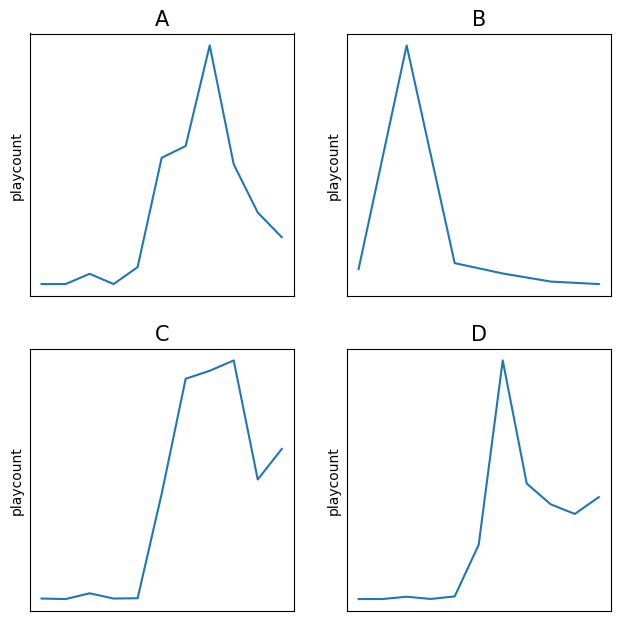

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**
1. Отфильтруйте таблицу и оставьте только данные по "звездному" треку.
2. По отфильтрованным данным, постройте сводную таблицу, где по строкам идет отчетный период (`period`), в столбце сумма по количеству прослушиваний (`playcount`) для каждой композиции.
3. Отсортируйте сводную таблицу по отчетному (`period`) и постройте линейный график.

</div>

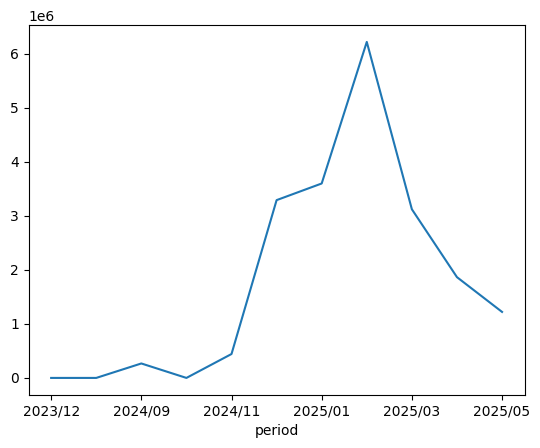

In [75]:
# 'track_00' - звезда
df[df['track'] == 'track_00'].groupby('period')['playcount'].sum().sort_index().plot();

**Ответ**: `A`

### *Задание 6.2*

>*Мы видим резкий рост популярности "звездного" трека с `???` (`period`). Это связано с тем, что пользователи TikTok (и его аналогов в РФ) запустили массовый челлендж под него.*
>
>*Давайте оценим, как виральность "звездного" трека отразилась на прослушивании остальной дискографии артиста.*
>
><div style="background-color: rgba(255, 255, 255, 0.3); text-align: center; padding: 12px; border-radius: 8px;">
>
>***Эффект Гало** (эффект снежного кома) — это когда успех одного продукта увеличивает популярность всех остальных продуктов компании.*
>
></div>
>
>*Найдите трек (`track`), для которого коэффициент подъема после челленджа наибольший:*
>$$\text{Lift factor} = \frac{\text{playcount}_{\text{после челленджа}}}{\text{playcount}_{\text{до челленджа}}}$$
>$\text{Lift factor}$ *показывает во сколько раз увеличилось количество прослушиваний.*

**Ответ**: видим резкий рост с **2024/11**

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. Создайте две таблицы `before` и `after`. В `before` будут храниться наблюдения по трекам до челленджа (**месяц начала роста включен**), в `after` информация по трекам после начала челленджа (месяц начала роста не включен).

2. Создайте две сводные таблицы по данным `before` и `after`. По строкам идут композиции (`track`), а в столбцах общее количество прослушиваний (`playcount`) каждой композиции.

3. Разделите одну сводную таблицу на другую, чтобы найти коэффициент подъема ($\text{Lift factor}$) и найдите трек, на который эффект Гало оказал наибольшее влияние.

</div>

</div>

In [79]:
# 1.
cond = (df['period_year'] <= 2024) & (df['period_month'] <= 11)
before_df = df[cond]
after_df = df[~cond]

# 2.
before_df_track = before_df.groupby('track')['playcount'].sum()
after_df_track = after_df.groupby('track')['playcount'].sum()

# 3.
lift_track = after_df_track / before_df_track
lift_track.sort_values(ascending=False).head(3)

track
track_23    4864.000000
track_17    4409.000000
track_06    3354.333333
Name: playcount, dtype: float64

**Ответ**: `track_23`

---

## **Задание 7**

**«Дикая кошка» — ваш главный актив будущего**. Это трек-первопроходец, который нашел аудиторию без бюджета и показывает взрывной рост.
- **Проверка гипотез**: Его успех доказывает, что новое звучание или нишевая тема работают. Ваша задача — удвоить ставку на эту победу.
- **Точечные инвестиции**: Небольшой, но сфокусированный бюджет на продвижение (например, в TikTok или таргетированная реклама) может дать взрывную окупаемость и превратить его в следующую «Звезду».



### *Задание 7.1*

>*Укажите, какой из графиков показывает динамику (`period`) количества прослушиваний (`playcount`) "дикой кошки" (`track`).*

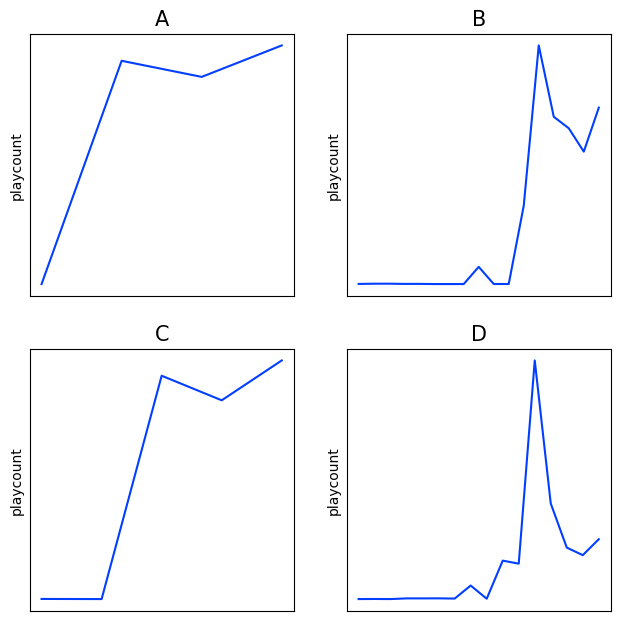

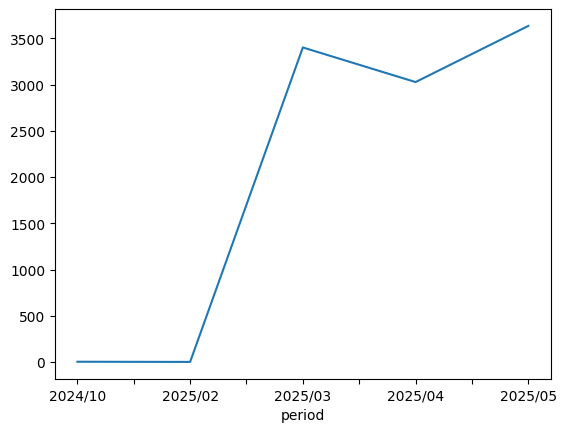

In [81]:
# дикая кошка - трек 06
df[df['track'] == 'track_06'].groupby('period')['playcount'].sum().sort_index().plot();

**Ответ**: `C`

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**🤔 Question**  

*Можно ли сказать, что популярность "дикой кошки" обусловлена эффектом Гало из-за челленджа под "звездный" трек?*

</div>


### *Задание 7.2*

>*Укажите как выглядит распределение доходов (`royalty`) и прослушиваний (`playcount`) "дикой кошки" (`track`) по стриминговым платформам (`platform`).*
>- Доход по платформам: `?`
>- Прослушивания по платформам: `?`

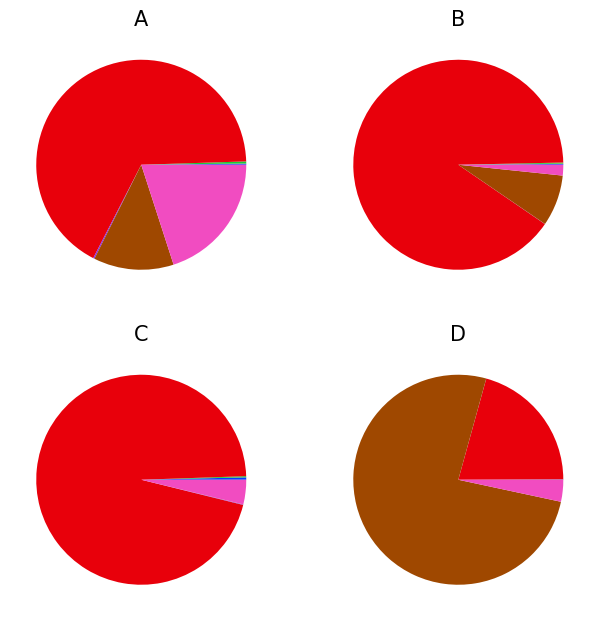

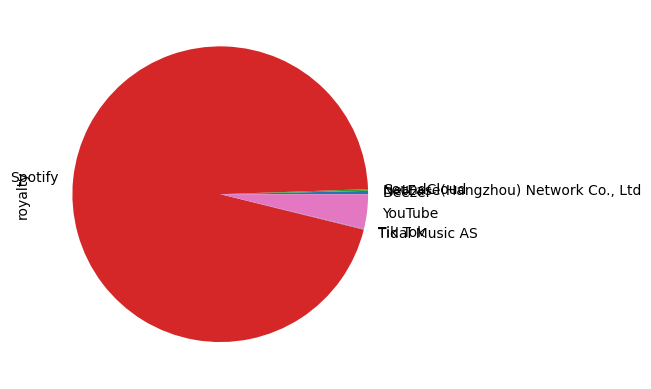

In [88]:
# Доход - C
df[df['track'] == 'track_06'].groupby('platform')['royalty'].sum().plot(kind='pie');

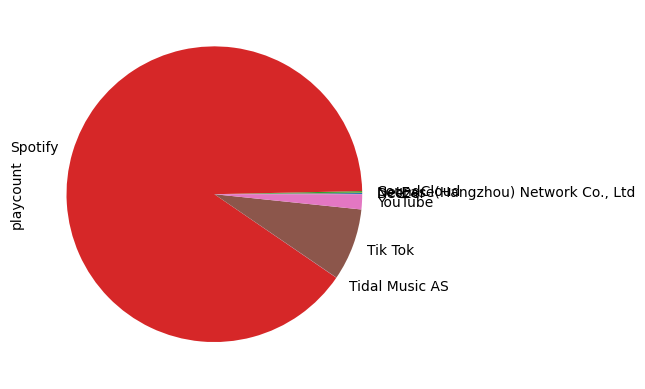

In [ ]:
# Прослушивания - B
df[df['track'] == 'track_06'].groupby('platform')['playcount'].sum().plot(kind='pie');

### *Задание 7.3*

>*Укажите на какой платформе (`platform`) следует продвигать "дикую кошку" (`track`) с точки зрения доходов (`royalty`) и прослушиваний (`platform`)*

In [91]:
df_cat = df[df['track'] == 'track_06'].groupby('platform')[['royalty', 'playcount']].sum()
df_cat.sort_values('royalty')

,royalty,playcount
platform,,
"NetEase(Hangzhou) Network Co., Ltd",0.176951,5
Tik Tok,0.267221,794
Tidal Music AS,0.769256,2
SoundCloud,2.090558,16
Deezer,4.457874,13
YouTube,46.539832,166
Spotify,1179.382207,9070


**Ответ**: `Spotify`

---

In [ ]:
def recode(x):
    if 'Mexican' in x:
        return 1
    else:
        return 0